# __Random Forest__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('breast_cancer.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [3]:
X = df.iloc[:,:-1]
y = df.outcome

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [4]:
X_train.shape

(455, 30)

In [5]:
X_test.shape

(114, 30)

In [220]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    random_state=19,
    min_samples_leaf=5
)

model.fit(X_train, y_train)

y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)

In [221]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('testing data: ',accuracy_score(y_test, y_predict_test))
print('training data:', accuracy_score(y_train, y_predict_train))

testing data:  0.9736842105263158
training data: 0.9824175824175824


In [186]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        65
           1       0.96      0.98      0.97        49

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [187]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       292
           1       0.98      0.94      0.96       163

    accuracy                           0.97       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455



In [222]:
pd.crosstab(y_test, y_predict_test)

col_0,0,1
outcome,,
0,63,2
1,1,48


<AxesSubplot:xlabel='col_0', ylabel='outcome'>

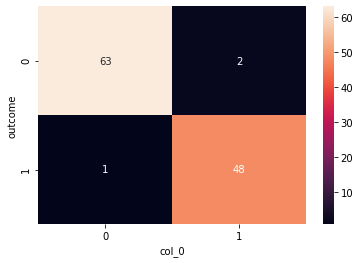

In [223]:
sns.heatmap(pd.crosstab(y_test, y_predict_test), annot=True)

# Model tweaking to make it perform better